In [43]:
pip install skillsnetwork

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform
from numpy.random import RandomState

warnings.filterwarnings('ignore')

In [2]:
#Grafica la relación de varianza por componente
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

In [90]:
def get_data_matrix(test=False,Length=100,Width=100,mypath=".images/"):

    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0] != '.']
    if mypath + '/.DS_Store' in files:
        files.remove(mypath + '/.DS_Store')
  
    if test:
        print("test data")
        files=files[9000:10000]
        
    else:
        print("training data")
        files=files[0:9000]
        
    print(len(files))
    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file).resize((Width, Length))
        img =  ImageOps.grayscale(img)

        I=np.array(img)
 
        X[i,:]=I.reshape(1,-1)
    return X

def reshape_row(x):
    plt.imshow(x.reshape(Length,Width),cmap="gray")

In [94]:
def threshold(similar_distance, max_=0.1, min_=0 ):
    dataset_index=np.where(np.logical_and(similar_distance>min_,similar_distance<max_))[0]
    query_index=similar_index[np.logical_and(similar_distance>min_,similar_distance<max_)]
    return dataset_index, query_index

In [97]:
def plot_data_query(dataset_index,query_index,N):
    for data_sample,query_sample in zip(dataset_index[0:N],query_index[0:N]):

        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        reshape_row(X[data_sample])
        plt.title("dataset sample {}".format(data_sample))
        plt.subplot(1,2,2)
        reshape_row(X_q[query_sample])
        plt.title("query sample match {}".format(query_sample))
        plt.show()

        print("-----------------------------------------------------")

## Ejercicio 
Realice analisis de componente principales en el dataset del consumo de energía mundial

In [98]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv')
df.drop('date', axis=1, inplace=True)
df = df.dropna().astype(np.float64)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [99]:
Escalador = StandardScaler()
df[:] = Escalador.fit_transform(df)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


In [100]:
PcaP= PCA()
PcaP.fit(df)

PCA()

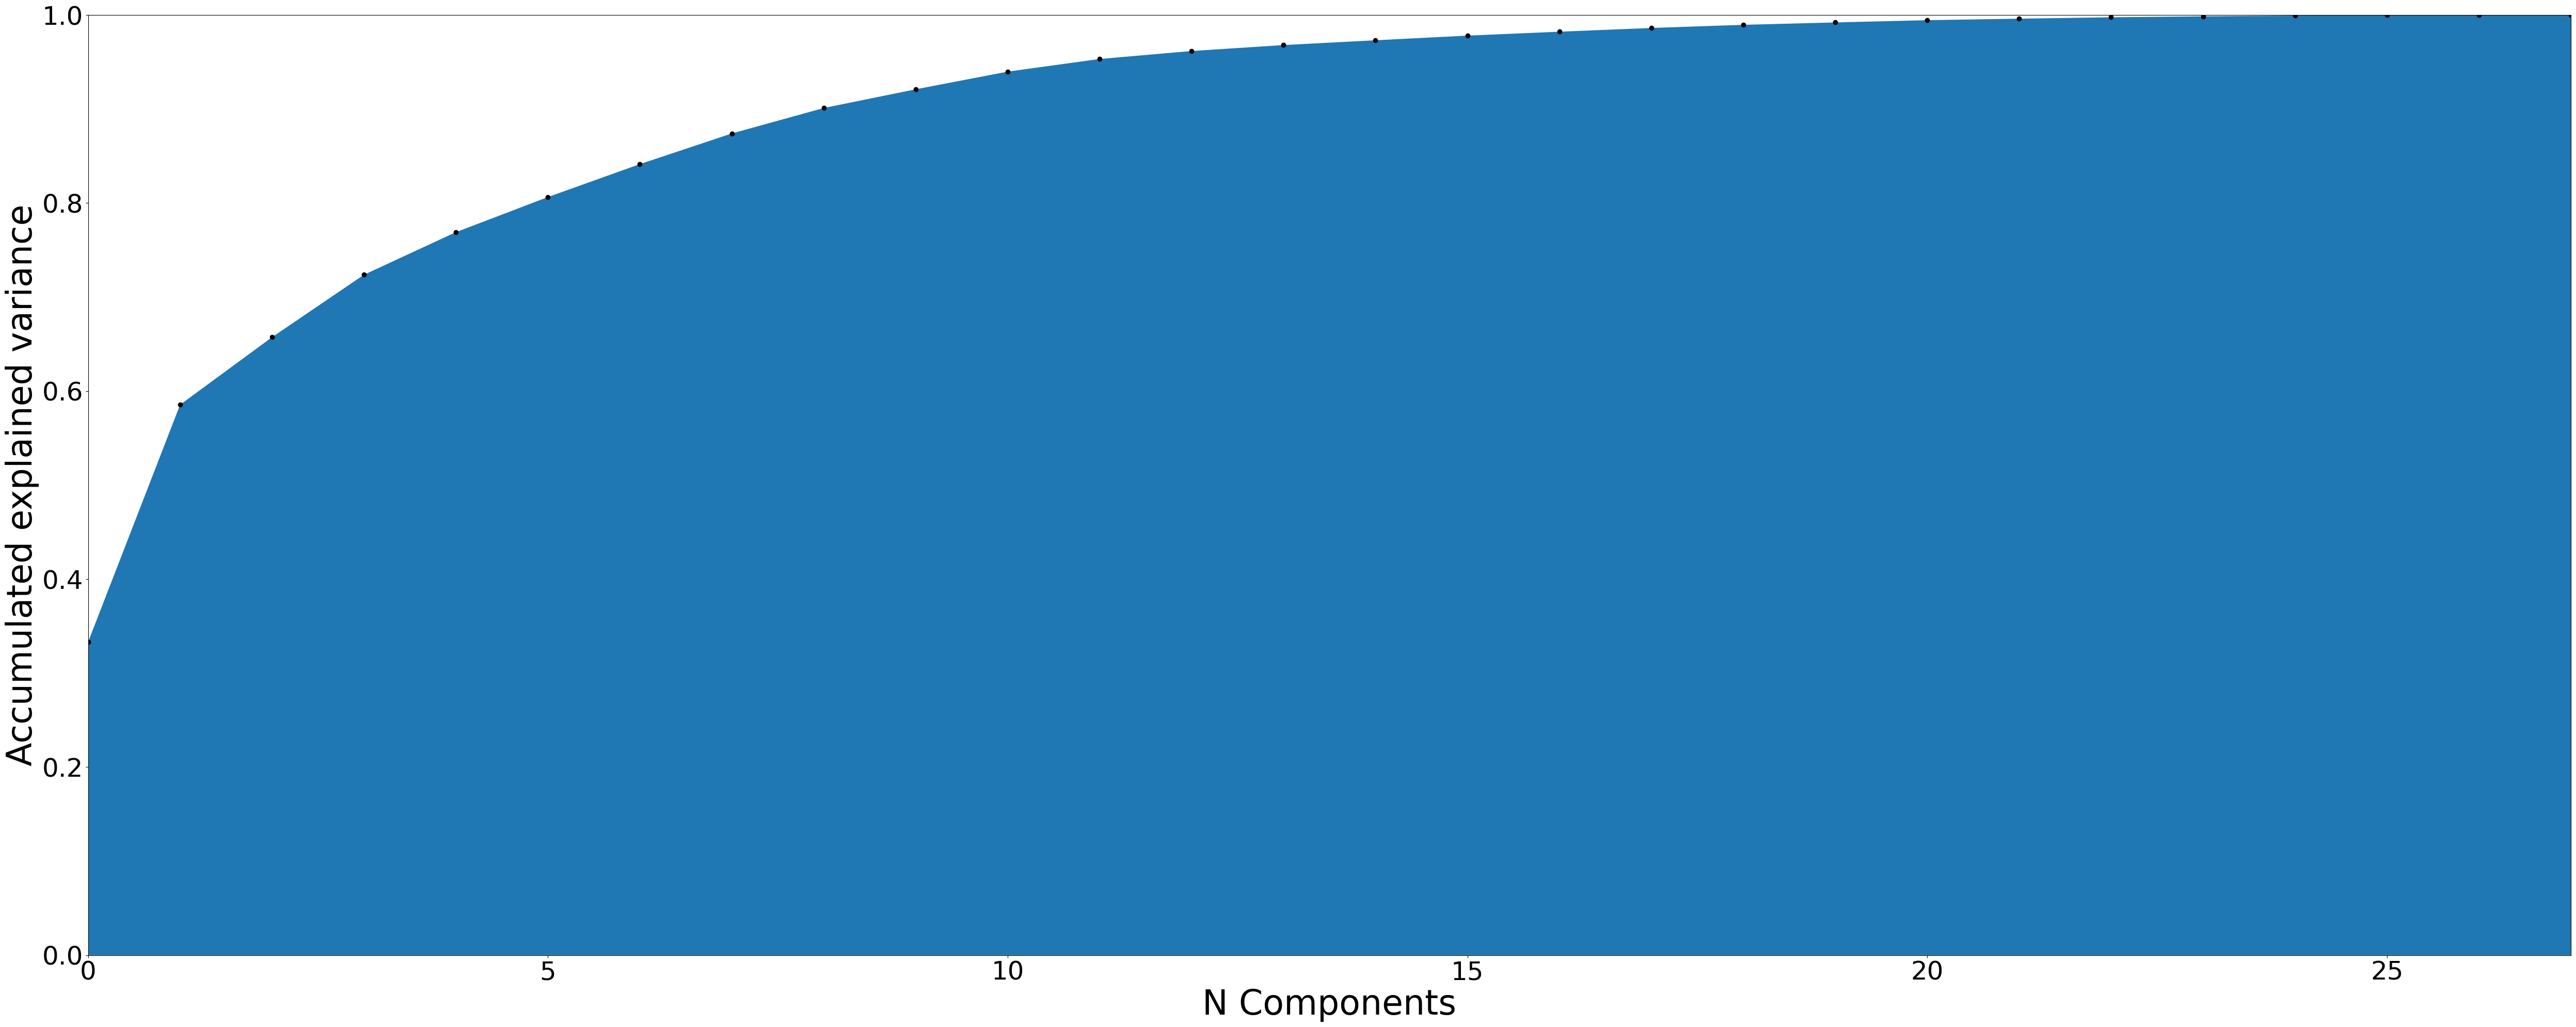

In [101]:
plot_explained_variance(PcaP)

se determinan 13 componentes prinpales necesarios para describir la varianza del sistema 

In [102]:
#np.argwhere(PcaP.explained_variance_ratio_.cumsum() > 0.96)[0][0] + 1

In [103]:
PcaS = PCA(n_components=13)
data_reducida=PcaS.fit(df).transform(df)

In [104]:
pd.DataFrame(data_reducida, columns=[f'Component {i}' for i in range(data_reducida.shape[1])]).head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12
0,-2.922039,-4.688402,-1.548784,1.200384,1.953325,-0.372920,2.529788,-0.640358,-2.475223,-0.748954,-1.448400,0.514306,-0.268641
1,-2.940551,-4.617382,-1.026564,1.273485,1.958929,-0.495274,2.237205,-0.583417,-2.463552,-0.854024,-1.437129,0.443661,-0.334112
2,-2.983922,-4.532971,-0.057812,1.455761,1.925351,-0.626959,1.941323,-0.559629,-2.499994,-0.949800,-1.460569,0.450197,-0.347673
3,-3.074540,-4.511345,1.503160,1.955986,2.803530,-0.560489,1.565011,-0.474951,-3.320774,-1.015321,-1.598426,0.410263,-0.555729
4,-3.050297,-4.486200,-1.798191,0.976510,2.843927,-0.700518,1.271911,-0.287486,-3.287536,-1.118611,-1.607082,0.419329,-0.551354


In [37]:
#plt.scatter(data_reducida[:,0], data_reducida[:,1],c=set)

## FACTORIZACIÓN DE MATRIZ NO NEGATIVA 

In [105]:
from sklearn.decomposition import NMF

import logging
from os import listdir, getcwd
from os.path import isfile, join
from PIL import Image,ImageOps
import os

In [106]:
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)
data = fetch_olivetti_faces(shuffle=True, random_state=rng)
X = data.images
#

In [107]:
image_shape= (64, 64)
def plot_faces(title, images, n_col, n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows = n_row,
        ncols = n_col,
        figsize = (2.0*n_col, 2.3*n_row),
        facecolor='white',
        constrained_layout=True)
    
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax)
        ax.axis('off')
    
    fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.99, 
                aspect=40, pad=0.01)
    plt.show()

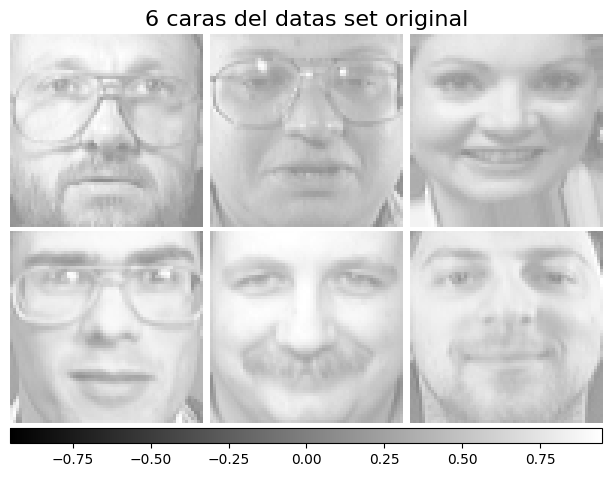

In [108]:
plot_faces("6 caras del datas set original", X[:6],3,2)

In [109]:
X_r= X[:300].reshape((300, 64*64))
X_q= X[300:].reshape((100, 64*64))

nmf= NMF(n_components=10, tol=5e-3, max_iter=2000)
X_r_W= nmf.fit_transform(X_r)
X_q_W= nmf.transform(X_q)

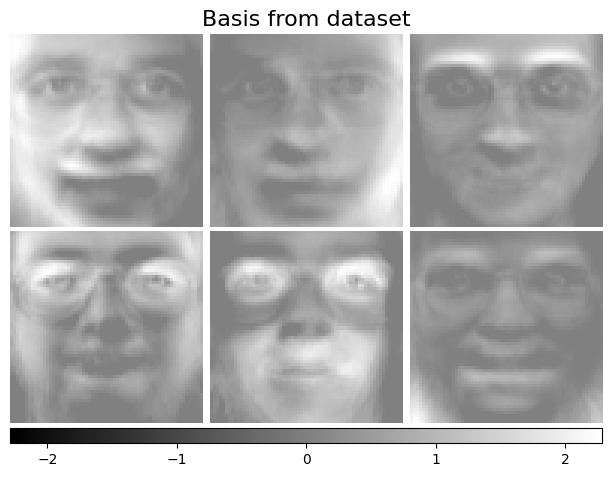

In [110]:
from sklearn.metrics import pairwise_distances 
D= pairwise_distances(X_r_W, X_q_W, metric='cosine')
H= nmf.components_
plot_faces("Basis from dataset", H,3,2)

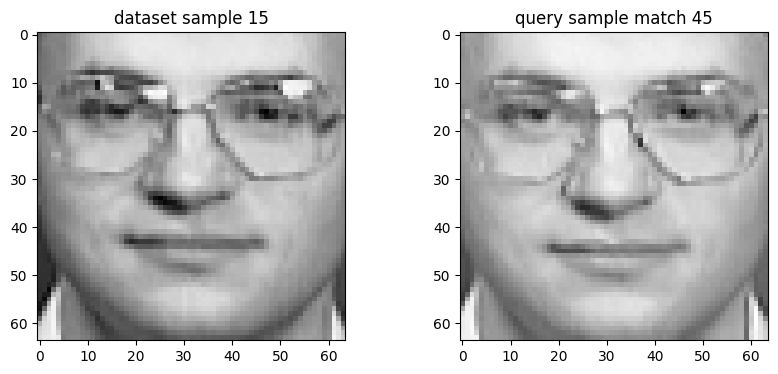

-----------------------------------------------------


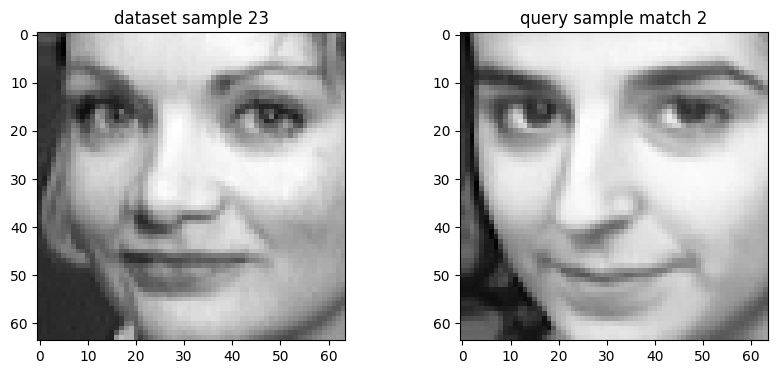

-----------------------------------------------------


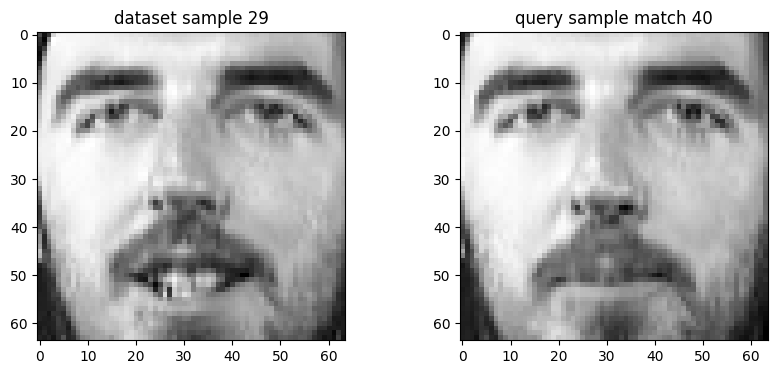

-----------------------------------------------------


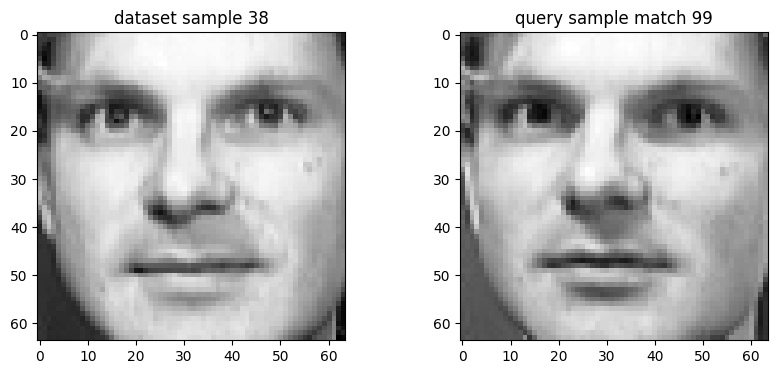

-----------------------------------------------------


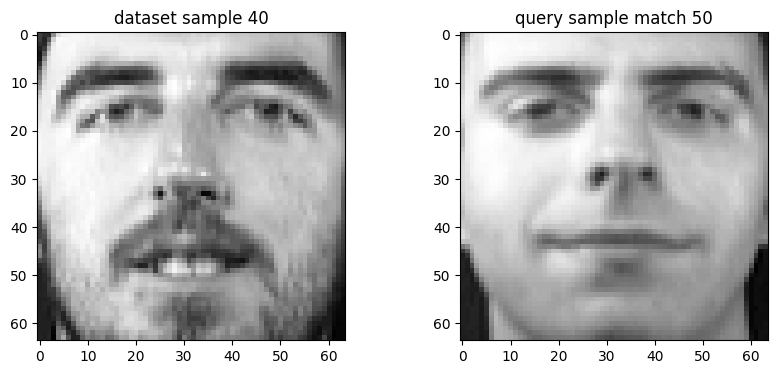

-----------------------------------------------------


In [111]:
similar_index=np.argmin(D, axis=1)
similar_distance=np.min(D, axis=1)
o_index, q_index= threshold(similar_distance, max_=0.005)

Length=64
Width=64
plot_data_query(o_index, q_index,5)

